# Importing Required Packages 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
%matplotlib inline

In [4]:
data = pd.read_csv('HR_comma_sep.csv')

# Basic Statistical Analysis

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(14999, 10)

In [7]:
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [10]:
# Convert "department" and "salary" features to numeric types because some functions won't be able to work with string types
data['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
data['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


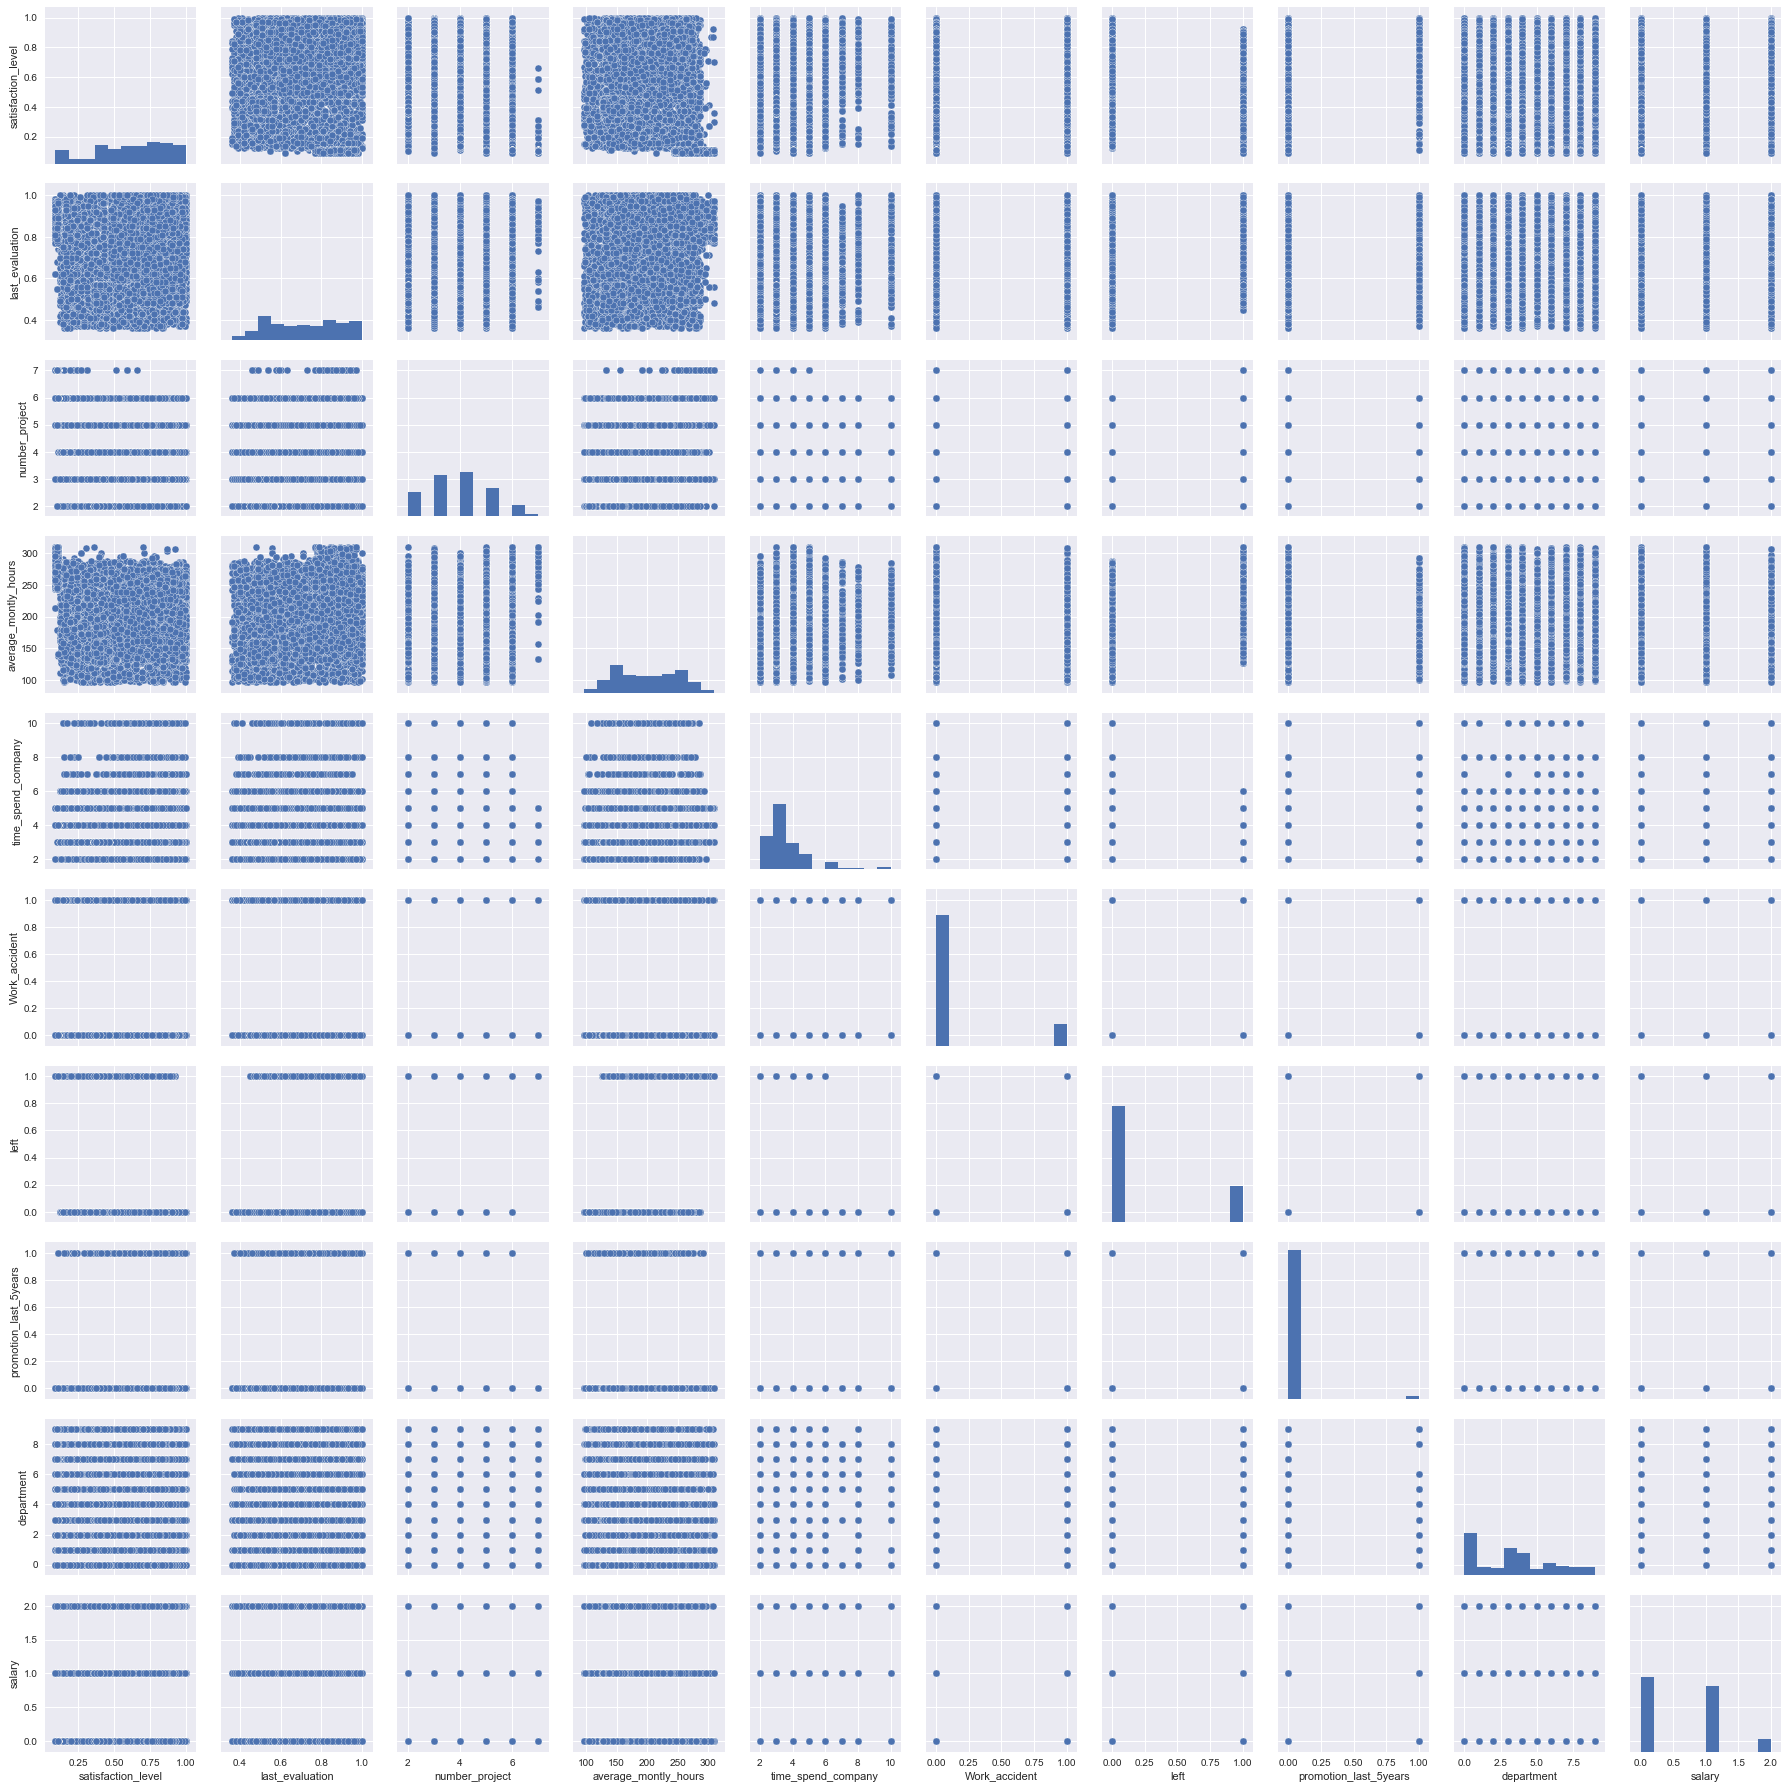

In [11]:
sns.pairplot(data=data)

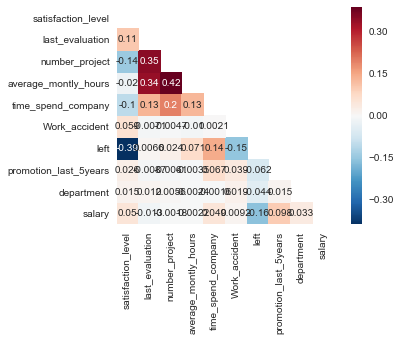

In [12]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

# Visualizations

The plot below shows the distribution for the promotion that people got and how many people left the company. We can observe that very few people received any promotion. Majority of the people have left the company with out obtaining any promotion

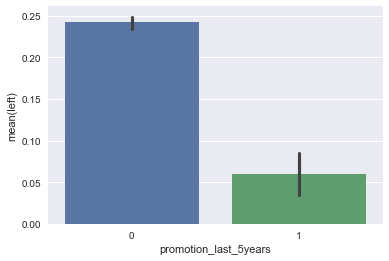

In [13]:
sns.barplot(x="promotion_last_5years", y="left", data= data)

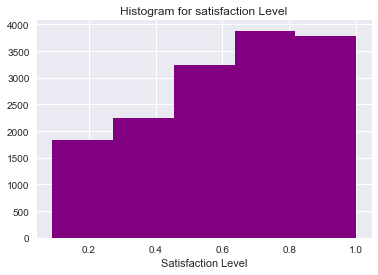

In [14]:
plt.hist(x='satisfaction_level', bins = 5, data = data, color='purple' )
plt.xlabel("Satisfaction Level")
plt.title("Histogram for satisfaction Level")

The plot below is the distribution between the project and their satisfaction level. It can be observed that the satisfaction level is maximum for projects (3,4,& 5). Where as for projects 6 & 7 the satisfaction level is very low

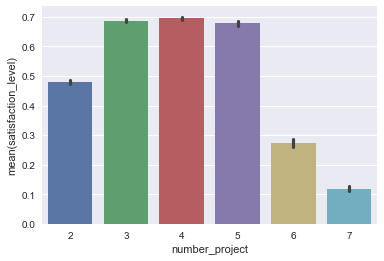

In [15]:
sns.barplot(data = data, x = 'number_project', y = 'satisfaction_level')

Even though the satisfaction level for project 6 & 7 is very low the time spent for these projects are really very high. It could be this reason why employess are not very happy with these projects

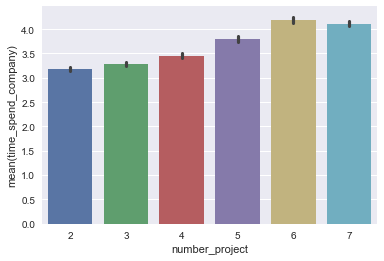

In [16]:
sns.barplot(data = data, x = 'number_project', y = 'time_spend_company')

Except for the accounting, hr & technical department other departments seem to be having equal amount of satisfaction. 

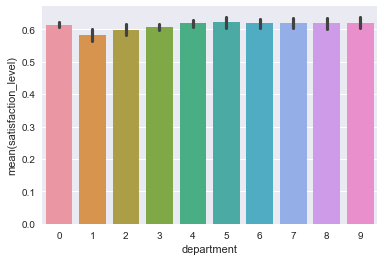

In [17]:
sns.barplot(data = data, x = 'department', y = 'satisfaction_level')

Inspite of employees spending lot of time with the management department they seem to be satisfied with their jobs.

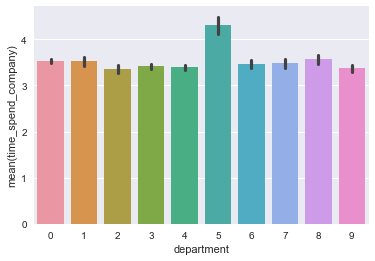

In [18]:
sns.barplot(data = data, x = 'department', y = 'time_spend_company')

A very obvious plot which shows us that the employees who earn higher are the ones who are most satisfied. 

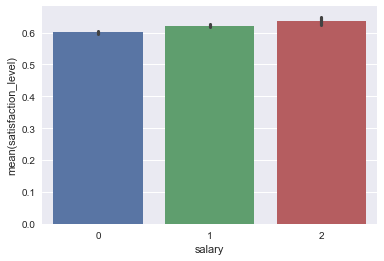

In [19]:
sns.barplot(data = data, x = 'salary', y = 'satisfaction_level')

Majority of the people working in this organization are being paid less

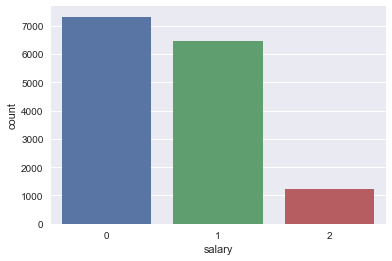

In [20]:
sns.countplot(data=data, x='salary')

And also the ones to be spending more amount of time in the company

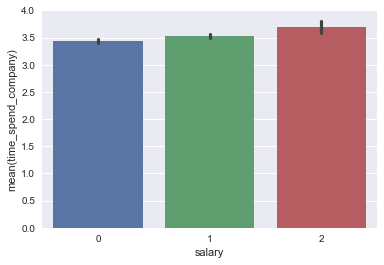

In [21]:
sns.barplot(data = data, x = 'salary', y = 'time_spend_company')

From the chart below we can observe that more number of employees seem to be working in the sales department. 

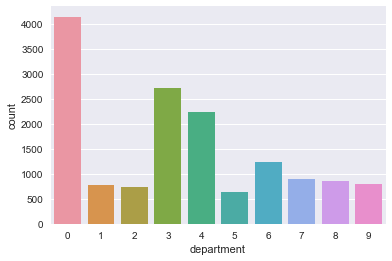

In [22]:
sns.countplot(x='department', data= data)

# DATA MODELS (Classifiers) 

In [23]:
from sklearn.model_selection import train_test_split
label = data.pop('left')
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.2, random_state = 15)

In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(data_train, label_train)
lg_score_train = lg.score(data_train, label_train)
#print("Training Score: ", lg_score_train)
lg_score_test = lg.score(data_test, label_test)
#print("Test Score: ", lg_score_test)

#SVM
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(data_train, label_train)
SVM_score_train = SVM.score(data_train, label_train)
#print("Training Score: ", SVM_score_train)
SVM_score_test = SVM.score(data_test, label_test)
#print("Test Score: ", SVM_score_test)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train, label_train)
knn_score_train = knn.score(data_train, label_train)
#print("Training Score: ", knn_score_train)
knn_score_test = knn.score(data_test, label_test)
#print("Test Score: ", knn_score_test)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(data_train, label_train)
rf_score_train = rf.score(data_train, label_train)
#print("Training Score: ", rf_score_train)
rf_score_test = rf.score(data_test, label_test)
#print("Test Score:", rf_score_test)

#NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(data_train, label_train)
nb_score_train = nb.score(data_train, label_train)
#print("Training Score: ", nb_score_train)
nb_score_test = nb.score(data_test, label_test)
#print("Test Score: ", nb_score_test)

#ADABoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(data_train, label_train)
ab_score_train = ab.score(data_train, label_train)
#print("Training score: ", ab_score_train)
ab_score_test = ab.score(data_test, label_test)
#print("Test score: ", ab_score_test)

#Bagging
from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier()
bag.fit(data_train, label_train)
bag_score_train = bag.score(data_train, label_train)
#print("Training Score:", bag_score_train)
bag_score_test = bag.score(data_test, label_test)
#print("Test Score: ", bag_score_test)

#decision trees
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
#print("Training Score:", dt_score_train)
dt_score_test = dt.score(data_test, label_test)
#print("Test Score: ", dt_score_test)

                 Model     Score
7       Decision Trees  1.000000
6              Bagging  0.998583
3        Random Forest  0.998167
5             AdaBoost  0.960747
1                  SVM  0.960080
2                  KNN  0.954413
4          Naive Bayes  0.801483
0  Logistic Regression  0.790399


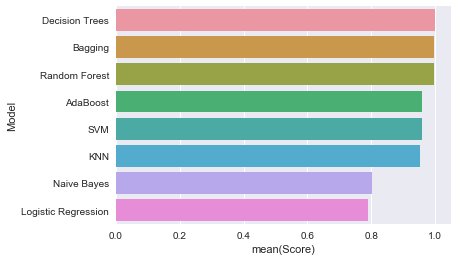

In [28]:
models = pd.DataFrame({
        'Model' : ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes', 'AdaBoost',
                   'Bagging', 'Decision Trees'],
        'Score' : [lg_score_train, SVM_score_train, knn_score_train, rf_score_train, nb_score_train, ab_score_train, bag_score_train, dt_score_train]
        #'Score' : [lg_score_test, SVM_score_test, knn_score_test, rf_score_test, nb_score_test, ab_score_test, bag_score_test, dt_score_test]
})

models = models.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

print(models)

sns.barplot(y=models.Model, x=models.Score)

                 Model     Score
3        Random Forest  0.990333
6              Bagging  0.988667
7       Decision Trees  0.978000
5             AdaBoost  0.964333
1                  SVM  0.955333
2                  KNN  0.940667
4          Naive Bayes  0.804333
0  Logistic Regression  0.788000


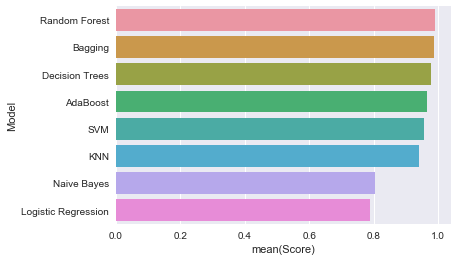

In [26]:
models = pd.DataFrame({
        'Model' : ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes', 'AdaBoost',
                   'Bagging', 'Decision Trees'],
        #'Training Score' : [lg_score_train, SVM_score_train, knn_score_train, rf_score_train, nb_score_train, ab_score_train, bag_score_train, dt_score_train]
        'Score' : [lg_score_test, SVM_score_test, knn_score_test, rf_score_test, nb_score_test, ab_score_test, bag_score_test, dt_score_test]
})

models = models.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

print(models)

sns.barplot(y=models.Model, x=models.Score)